# _Analysis_

- There is a correlation between number of rides and the average fare per city. Urban cities
  has the highest number of rides, the highest number of drivers and had the lowest average fare
  of the three city types.
- Urban cities have the highest percentage of total fares (63.0%), have the largest percentage of total rides(68.4%)and had the largest percentage of drivers(86.2%).
- Even though rural cities had the highest average fare per city, the rural cities had the smallest segment of the total fares by city pie chart at 6.7%.

In [56]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading csv file
city_data = pd.read_csv("Resources/city_data.csv")
ride_data = pd.read_csv("Resources/ride_data.csv")

# drop one duplicate record with same city name, same ride_ids but different # of drivers
city_data = city_data.drop_duplicates('city')

# Merging city_data and ride_data
Pyber = pd.merge(city_data,ride_data, on ='city')
Pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


# _Bubble Plot of Ride Sharing Data_

In [57]:
#group be city name
by_city = Pyber.groupby('city')

# Average Fare ($) Per City
avg_fare = round(by_city['fare'].mean(),2).map("${:.2f}".format)
# Total Number of Drivers Per City
ride_count = by_city['ride_id'].count()
# Total Number of Drivers Per City
driver_count = by_city['driver_count'].mean()
# City Type (Urban, Suburban, Rural)
city_type = city_data.set_index('city')['type']

# Dataframe from above series
city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
                         })
city_info.sort_values('Number of Drivers', ascending = False)
city_info.head()

,Average Fare,Number of Drivers,Number of Rides,Type of City
Alvarezhaven,$23.93,21,31,Urban
Alyssaberg,$20.61,67,26,Urban
Anitamouth,$37.32,16,9,Suburban
Antoniomouth,$23.62,21,22,Urban
Aprilchester,$21.98,49,19,Urban


/Users/kanika/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kanika/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/kanika/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

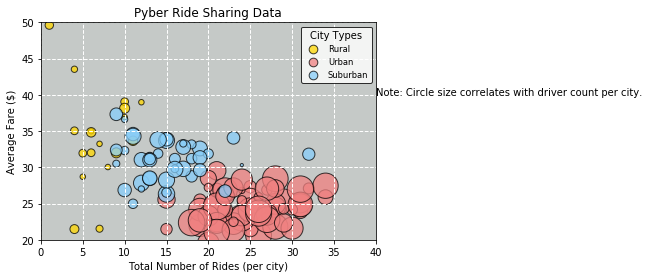

In [59]:
# Seperate dataframes for Rural, urban and suburban
rural = city_info[city_info['Type of City'] == 'Rural']
urban = city_info[city_info['Type of City'] == 'Urban']
suburban = city_info[city_info['Type of City'] == 'Suburban']

# converting datatype to float
rural['Average Fare'] = rural['Average Fare'].replace('\$','', regex=True).astype('float')
urban['Average Fare'] = urban['Average Fare'].replace('\$','', regex=True).astype('float')
suburban['Average Fare'] = suburban['Average Fare'].replace('\$','', regex=True).astype('float')


#printing scatter plot

plt.title('Pyber Ride Sharing Data')
plt.grid(color='w', linestyle='-', linewidth=1)
plt.scatter(rural['Number of Rides'], 
            rural['Average Fare'], 
            s = rural['Number of Drivers']*10, 
            color = 'gold', 
            edgecolor = 'black', 
            label = 'Rural', 
            alpha = .75,
            linewidths = 1)

plt.scatter(urban['Number of Rides'], 
            urban['Average Fare'], 
            s=urban['Number of Drivers']*10, 
            color = 'lightcoral',
            edgecolor= 'black',
            label = 'Urban',
            alpha = .75,
            linewidths = 1)

plt.scatter(suburban['Number of Rides'], 
            suburban['Average Fare'], 
            s=suburban['Number of Drivers']*10, 
            color = 'lightskyBlue',
            edgecolor= 'black',
            label = 'Suburban',
            alpha = .75,
            linewidths = 1)

plt.legend (loc = "upper right")
plt.text(40,40,"Note: Circle size correlates with driver count per city.")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.ylim(20,50)
plt.xlim(0,40)

plt.grid(color='w', linestyle='dashed', linewidth=1)
#legend formatting
lgnd = plt.legend(frameon = True, edgecolor = 'black', title = 'City Types', fontsize = 'small')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
ax = plt.gca()
ax.set_facecolor('xkcd:silver')
plt.show()

## _Total Fares by City Type_

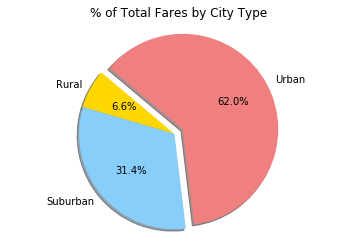

In [54]:
# % of Total Fares by City Type
city_type = Pyber.groupby('type')
Total_fare= city_type['fare'].sum()

Total_fare_df = pd.DataFrame(Total_fare)
Overall_fare = Total_fare_df['fare'].sum()
Total_fare_df['Percentage of Fare'] = round((Total_fare_df['fare']/Overall_fare)*100,1).map("{:.1f}%".format)

plt.title("% of Total Fares by City Type")
explode = [0,0,0.1]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyBlue', 'lightCoral']
plt.pie(Total_fare, 
       explode = explode,
        labels = labels,
        colors = colors,
        shadow = True,
        autopct = '%1.1f%%',
        startangle = 140
       )
plt.axis("equal")
plt.show()

# _Total Rides by City Type_

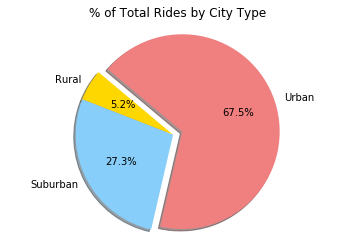

In [55]:
# % of Total Rides by City Type
city_type = Pyber.groupby('type')
ride_count = city_type['ride_id'].count()

Total_ride = pd.DataFrame(ride_count)
Overall_rides = Total_ride['ride_id'].sum()

Total_ride['Percentage of Rides'] = round((Total_ride['ride_id']/Overall_rides)*100,1).map("{:.1f}%".format)

plt.title("% of Total Rides by City Type")
explode = [0,0,0.1]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyBlue', 'lightCoral']
plt.pie(ride_count, 
       explode = explode,
        labels = labels,
        colors = colors,
        shadow = True,
        autopct = '%1.1f%%',
        startangle = 140)
plt.axis("equal")
plt.show()

# _Total Drivers by City Type_

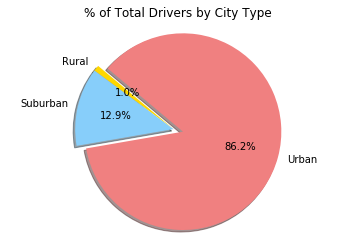

In [198]:
# % of Total Drivers by City Type
city_type = Pyber.groupby('type')
driver_count = city_type.sum()['driver_count']
Total_driver = pd.DataFrame(driver_count)
overall_driver_count = Total_driver['driver_count'].sum()
Total_driver['Percentage of Drivers'] = round(Total_driver['driver_count']/overall_driver_count*100,1).map("{:.1f}%".format)
Total_driver

plt.title("% of Total Drivers by City Type")
explode = [0,0,0.1]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyBlue', 'lightCoral']
plt.pie(driver_count, 
       explode = explode,
        labels = labels,
        colors = colors,
        shadow =True,
        autopct = '%1.1f%%',
        startangle = 140
       )
plt.axis("equal")
plt.show()